# Método del descenso máximo

Implementaremos este método para encontrar el mínimo de la función

$$f(x, y)=10y^4+(1-x)^2.$$

En el laboratorio anterior definimos la función y su gradiente

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def f(x, y):
    return 10*(y**4)+(1-x)**2

In [ ]:
def gradiente(punto):
  x=punto[0]
  y=punto[1]
  fx=-2*(1-x)
  fy=40*(y**3)
  return np.array([fx, fy])

Dado el punto inicial
$$x_0=(3, 0.5)$$
ubicamos la dirección de máximo decrecimiento $v=-\nabla f(x_0)$ y definimos
$$g(\alpha)=f(x_0+\alpha v)$$

In [ ]:
x0=[3, 0.5]
def g(alpha):
  punto=x0-alpha*gradiente(x0)
  x=punto[0]
  y=punto[1]
  return f(x, y)

En el laboratorio anterior graficamos y hallamos el mínimo de dicha función

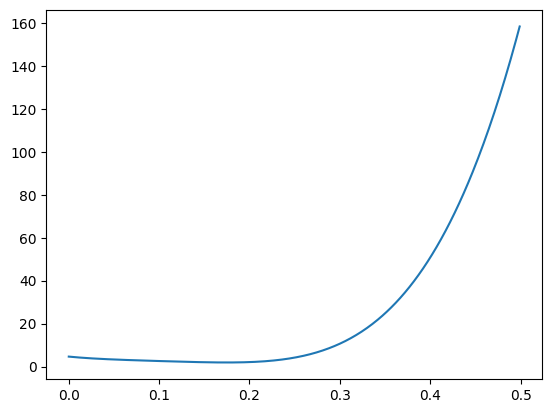

In [ ]:
x = np.arange(0.0, 0.5, 0.001)   #
y=np.array([g(t) for t in x])

plt.plot(x, y)

In [ ]:
from scipy.optimize import minimize_scalar

alpha=minimize_scalar(g).x
alpha

0.1746750912822985

El mínimo ocurre aproximadamente en $0.1747$ por lo tanto ese debe ser el valor de alpha para realizar la actualización del punto luego
$$x_1=x_0-\alpha \nabla f(x_0)$$

In [ ]:
x1=x0-alpha*gradiente(x0)
x1

array([ 2.30129963, -0.37337546])

Redefinimos

In [ ]:
def gradiente_f(x):  #input lista x=[a, b]
  fx=-2*(1-x[0])
  fy=40*(x[1]**3)
  return np.array([fx, fy])


In [ ]:
x1=x0-alpha*gradiente_f(x0)

In [ ]:
x1

array([ 2.30129963, -0.37337546])

Programaremos una función que implemente el método de descenso máximo. Debe recibir como input:
- La función a optimizar (de modo que su input sea un array o lista)
- El gradiente de la función (de modo que su input sea un array o lista)
- La tolerancia
- Un número máximo de iteraciones pasado el cual el algoritmo se detiene.
- Punto inicial $x_0$.

Debe tener como output:
- El punto donde se encuentra el mínimo
- El valor mínimo de la función.

In [ ]:
def f(x):
    return 10*(x[1]**4)+(1-x[0])**2

def gradiente_f(x):  #input lista x=[a, b]
  fx=-2*(1-x[0])
  fy=40*(x[1]**3)
  return np.array([fx, fy])

In [ ]:
x0=[3, 0.5]
for i in range(1000):
  def g(t):
    return f(x0-t*gradiente_f(x0))
  alpha=minimize_scalar(g).x
  x0 = x0-alpha*gradiente_f(x0)
print(x0, f(x0))

[ 0.99999934 -0.00345316] 1.4223216522721159e-09


In [ ]:
def descenso_maximo(f, gradiente, x0, epsilon, max_iter):

  tamano_paso=epsilon+1 # Para entrar en el loop

  iter=0

  while (tamano_paso>epsilon) and (iter<max_iter):
    iter+=1

    def g(alpha):
      punto=x0-alpha*gradiente(x0)
      return f(punto)

    alpha=minimize_scalar(g).x

    x0=x0-alpha*gradiente(x0)   # Actualizamos el punto
    tamano_paso=np.linalg.norm(alpha*gradiente(x0)) # Calculamos el tamaño de paso

  if (iter==max_iter):
    print("El método no convergió")
  xmin=x0
  return [xmin, f(xmin)]

In [ ]:
x0=[3, 0.5]
epsilon=10**-5
max_iter=1000
descenso_maximo(f, gradiente_f, x0, epsilon, max_iter)

[array([ 0.99999619, -0.00619669]), 1.475929659133408e-08]

## **Ejercicio 1:**

Encuentre el mínimo de la función

$$f(x, y)=10(y-x^2)^2+(1-x)^2$$

utilizando el método de descenso máximo probando diferentes puntos iniciales.

In [ ]:
def f(x):
    return 10*(x[1] - x[0]**2)**2+(1-x[0])**2

In [ ]:
def gradiente_f(x):  #input lista x=[a, b]
  fx= -40*x[0]*(x[1] - x[0]**2) - 2*(1-x[0])
  fy= 20*(x[1] - x[0]**2)
  return np.array([fx, fy])

In [ ]:
x0=[4, 3]
epsilon=10**-5
max_iter=1000
descenso_maximo(f, gradiente_f, x0, epsilon, max_iter)

[array([1.0009285 , 1.00190152]), 8.811701571991232e-07]